In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [2]:
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])

In [3]:
model.compile(optimizer='sgd', loss='mse')

In [4]:
xs = np.array([-1.0,  0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

In [5]:
model.fit(xs, ys, epochs=500)

Epoch 1/500
1/1 [==============================] - 0s 91ms/step - loss: 22.5985
Epoch 2/500
1/1 [==============================] - 0s 1ms/step - loss: 18.0584
Epoch 3/500
1/1 [==============================] - 0s 1ms/step - loss: 14.4808
Epoch 4/500
1/1 [==============================] - 0s 1ms/step - loss: 11.6604
Epoch 5/500
1/1 [==============================] - 0s 1ms/step - loss: 9.4360
Epoch 6/500
1/1 [==============================] - 0s 1ms/step - loss: 7.6806
Epoch 7/500
1/1 [==============================] - 0s 1ms/step - loss: 6.2942
Epoch 8/500
1/1 [==============================] - 0s 1ms/step - loss: 5.1983
Epoch 9/500
1/1 [==============================] - 0s 2ms/step - loss: 4.3311
Epoch 10/500
1/1 [==============================] - 0s 2ms/step - loss: 3.6438
Epoch 11/500
1/1 [==============================] - 0s 2ms/step - loss: 3.0982
Epoch 12/500
1/1 [==============================] - 0s 2ms/step - loss: 2.6643
Epoch 13/500
1/1 [==============================] - 0s 2

In [6]:
print(model.predict([10.0]))

1/1 [==============================] - 0s 35ms/step
[[18.98021]]


### more layers and more neurons does not mean better model this model is worse than the previous one even though it has more layers and more neurons
we use more neurons when we try classify very complex relations such as colors and videos

```python
model2 = tf.keras.Sequential([
    keras.layers.Dense(10, activation='relu' ,input_shape=[1]),
    keras.layers.Dense(8, activation='relu', input_shape=[1]),
    keras.layers.Dense(1, input_shape=[1])

])
```

### Housing price model: 

In [7]:
import tensorflow as tf
import numpy as np

def house_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(units=1, input_shape=[1])
    ])
    model.compile(optimizer='sgd', loss='mean_squared_error')
    xs = np.array([0, 1, 2, 3, 4, 5], dtype=float)
    ys = np.array([0.5, 1, 1.5, 2, 2.5, 3], dtype=float)
    model.fit(xs, ys, epochs=500)
    return model

model = house_model()




Epoch 1/500
1/1 [==============================] - 0s 85ms/step - loss: 37.6942
Epoch 2/500
1/1 [==============================] - 0s 2ms/step - loss: 24.2800
Epoch 3/500
1/1 [==============================] - 0s 2ms/step - loss: 15.6395
Epoch 4/500
1/1 [==============================] - 0s 2ms/step - loss: 10.0740
Epoch 5/500
1/1 [==============================] - 0s 2ms/step - loss: 6.4890
Epoch 6/500
1/1 [==============================] - 0s 2ms/step - loss: 4.1799
Epoch 7/500
1/1 [==============================] - 0s 2ms/step - loss: 2.6925
Epoch 8/500
1/1 [==============================] - 0s 2ms/step - loss: 1.7344
Epoch 9/500
1/1 [==============================] - 0s 2ms/step - loss: 1.1173
Epoch 10/500
1/1 [==============================] - 0s 2ms/step - loss: 0.7197
Epoch 11/500
1/1 [==============================] - 0s 1ms/step - loss: 0.4637
Epoch 12/500
1/1 [==============================] - 0s 1ms/step - loss: 0.2988
Epoch 13/500
1/1 [==============================] - 0s 2

In [8]:
new_x = 7.0
prediction = model.predict([new_x])
print("Prediction: ", prediction)



1/1 [==============================] - 0s 25ms/step
Prediction:  [[3.9984906]]


#### notes: 
* the fist layers input should be the type of input 
* the last layer should have as mane neurons as the number of classes for example if we have 10 classes(shoes, jeans ...) we should have 10 neurons in the last layer

<br>
<br>
<br>

## Computer vision example:
The Fashion MNIST dataset is a collection of grayscale 28x28 pixel clothing images. Each image is associated with a label 

In [9]:
fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

LABEL: 3

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   0   0   0  33  96 175 156  64  14  54 137 204 194 102   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  73 186 177 183 175 188 232 255 223 219 194 179 186 213 146   0   0   0   0   0   0   0]
 [  0   0   0   0   0  35 163 140 150 152 150 146 175 175 173 171 156 152 148 129 156 140   0   0   0   0   0   0]
 [  0   0   0   0   0 150 142 140 152 160 156 146 142 127 135 133 140 140 137 133 125 169  75   0   0   0   0   0]
 [  0   0   0   0   0  54 167 146 129 142 137 137 131 148 148 133 131 131 131 125 140 140   0   0   0   0   0   0]
 [  0   0   0   0   0   0 110 188 133 146 152 133 125 127 119 129 133 119 140 131 150  14   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 221 158 137 135 123 110 110 114 108 112 117 127 142  77   0   0   0   0   0   0   0]
 [  0   0   0   0   0   4   0  25 158 137 125 119 119 110 117 117 110 119 127 144   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 123 156 129 112 

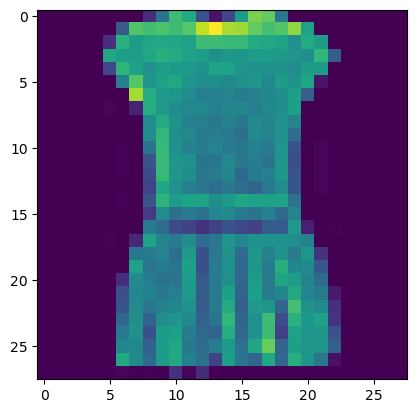

In [10]:
import matplotlib.pyplot as plt

index = 3
np.set_printoptions(linewidth=320)

print(f'LABEL: {training_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {training_images[index]}')

plt.imshow(training_images[index])

In [11]:
training_images = training_images/255.0
test_images = test_images/255.0
 

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    
    ])

Sequential: That defines a sequence of layers in the neural network.

Flatten: Remember earlier where our images were a 28x28 pixel matrix when you printed them out? Flatten just takes that square and turns it into a 1-dimensional array.

Dense: Adds a layer of neurons

Each layer of neurons need an activation function to tell them what to do. There are a lot of options, but just use these for now:

ReLU effectively means:

if x > 0: 
  return x

else: 
  return 0
In other words, it only passes values greater than 0 to the next layer in the network.

Softmax takes a list of values and scales these so the sum of all elements will be equal to 1. When applied to model outputs, you can think of the scaled values as the probability for that class. For example, in your classification model which has 10 units in the output dense layer, having the highest value at index = 4 means that the model is most confident that the input clothing image is a coat. If it is at index = 5, then it is a sandal, and so forth. See the short code block below which demonstrates these concepts. You can also watch this lecture if you want to know more about the Softmax function and how the values are computed.


### more notes: 
* we use more layers in order to find more complex patterns in the data
* more neurons takes more time but more accurate
* Consider the impact of training for more or less epochs. Why do you think that would be the case: 

Try 15 epochs -- you'll probably get a model with a much better loss than the one with 5
Try 30 epochs -- you might see the loss value decrease more slowly, and sometimes increases. You'll also likely see that the results of model.evaluate() didn't improve much. It can even be slightly worse.This is a side effect of something called 'overfitting' which you can learn about later and it's something you need to keep an eye out for when training neural networks. There's no point in wasting your time training if you aren't improving your loss, right! :)

In [13]:
# Declare sample inputs and convert to a tensor
inputs = np.array([[1.0, 3.0, 4.0, 2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function: {inputs.numpy()}')

# Feed the inputs to a softmax activation function
outputs = tf.keras.activations.softmax(inputs)
print(f'output of softmax function: {outputs.numpy()}')

# Get the sum of all values after the softmax
sum = tf.reduce_sum(outputs)
print(f'sum of outputs: {sum}')

# Get the index with highest value
prediction = np.argmax(outputs)
print(f'class with highest probability: {prediction}')

input to softmax function: [[1. 3. 4. 2.]]
output of softmax function: [[0.0320586  0.23688282 0.64391426 0.08714432]]
sum of outputs: 1.0
class with highest probability: 2


In [14]:
model.compile(optimizer= tf.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 1s 625us/step - loss: 0.4942 - accuracy: 0.8272
Epoch 2/10
1875/1875 [==============================] - 1s 634us/step - loss: 0.3740 - accuracy: 0.8645
Epoch 3/10
1875/1875 [==============================] - 1s 632us/step - loss: 0.3364 - accuracy: 0.8781
Epoch 4/10
1875/1875 [==============================] - 1s 646us/step - loss: 0.3147 - accuracy: 0.8850
Epoch 5/10
1875/1875 [==============================] - 1s 651us/step - loss: 0.2969 - accuracy: 0.8902
Epoch 6/10
1875/1875 [==============================] - 1s 639us/step - loss: 0.2803 - accuracy: 0.8962
Epoch 7/10
1875/1875 [==============================] - 1s 629us/step - loss: 0.2687 - accuracy: 0.9002
Epoch 8/10
1875/1875 [==============================] - 1s 627us/step - loss: 0.2567 - accuracy: 0.9062
Epoch 9/10
1875/1875 [==============================] - 1s 595us/step - loss: 0.2491 - accuracy: 0.9075
Epoch 10/10
1875/1875 [==============================] - 1s 541u

In [15]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 392us/step - loss: 0.3320 - accuracy: 0.8835


[0.33201566338539124, 0.8834999799728394]

In [16]:
classifications = model.predict(test_images)

print(classifications[1])

print(test_labels[1])



313/313 [==============================] - 0s 433us/step
[1.6344359e-04 6.0297172e-14 9.9234676e-01 6.1146026e-09 2.2926833e-03 7.8768823e-12 5.1971353e-03 9.1486639e-15 4.7553697e-12 1.5872898e-16]
2


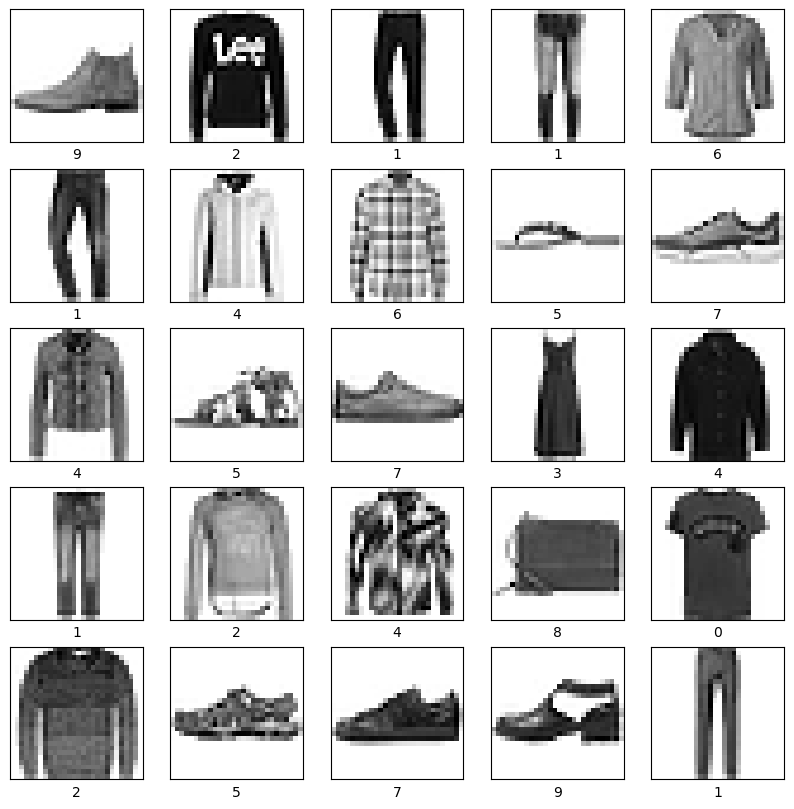

In [17]:
import matplotlib.pyplot as plt

# Display a grid of images from the test dataset
plt.figure(figsize=(10, 10))  # Set the figure size
for i in range(25):  # Display the first 25 images
    plt.subplot(5, 5, i + 1)  # Create a subplot for each image
    plt.xticks([])  # Remove x-axis ticks
    plt.yticks([])  # Remove y-axis ticks
    plt.grid(False)  # Turn off grid
    plt.imshow(test_images[i], cmap=plt.cm.binary)  # Display the image
    plt.xlabel(test_labels[i])  # Show the label (class)
plt.show()  # Display the grid of images


True Label: 2


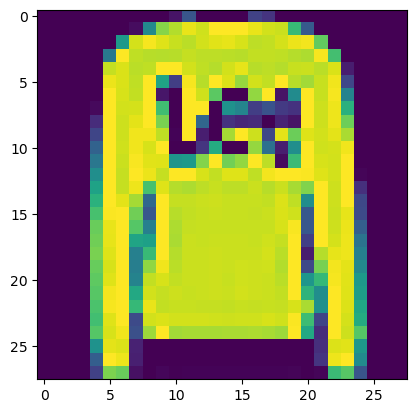

1/1 [==============================] - 0s 8ms/step
Model's Prediction: 2


In [18]:
# Assuming test_labels and test_images are your test data
index = 1
print("True Label:", test_labels[index])
plt.imshow(test_images[index])
plt.show()

classifications = model.predict(np.array([test_images[index]]))  # Assuming test_images is a list or array
print("Model's Prediction:", np.argmax(classifications[0]))  

In [19]:

import os
import tensorflow as tf
from tensorflow import keras

# grader-required-cell

# Load the data

# Get current working directory
current_dir = os.getcwd()

# Append data/mnist.npz to the previous path to get the full path
data_path = os.path.join(current_dir, "data/mnist.npz")

# Discard test set
(x_train, y_train), _ = tf.keras.datasets.mnist.load_data(path=data_path)
        
# Normalize pixel values
x_train = x_train / 255.0


data_shape = x_train.shape

print(f"There are {data_shape[0]} examples with shape ({data_shape[1]}, {data_shape[2]})")

# grader-required-cell

# GRADED CLASS: myCallback
### START CODE HERE

# Remember to inherit from the correct class
class myCallback(tf.keras.callbacks.Callback):
        # Define the correct function signature for on_epoch_end
        def on_epoch_end(self,epoch, logs={}):
            if logs.get('accuracy') > 0.99:                 
                print("\nReached 99% accuracy so cancelling training!")
                
                # Stop training once the above condition is met
                self.model.stop_training = True

                
### END CODE HERE

# grader-required-cell

# GRADED FUNCTION: train_mnist
def train_mnist(x_train, y_train):

    ### START CODE HERE
    
    # Instantiate the callback class
    callbacks = myCallback()
    
    # Define the model
    model = tf.keras.models.Sequential([         
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
        
        
    ]) 
    
    # Compile the model
    model.compile(optimizer='adam',                   
                  loss='sparse_categorical_crossentropy',                   
                  metrics=['accuracy'])     
    
    # Fit the model for 10 epochs adding the callbacks
    # and save the training history
    history = model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

    ### END CODE HERE

    return history

hist = train_mnist(x_train, y_train)



FileNotFoundError: [Errno 2] No such file or directory: '/Users/sami/AI/Coursera/data/mnist.npz'